# Imports*

In [16]:
import os
import re
import glob
import soundfile as sf
from IPython.display import Audio
from IPython.display import display

from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, ifft, fftfreq
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

# Download my signals*

In [17]:
login = "xhricma00"
zip_file = login + ".zip"
assignment_file = "https://www.fit.vut.cz/study/course/ISS/public/proj2024-25/personal/" + zip_file
!wget $assignment_file
!unzip -o $zip_file
!rm $zip_file

--2024-11-15 19:22:51--  https://www.fit.vut.cz/study/course/ISS/public/proj2024-25/personal/xhricma00.zip
Resolving www.fit.vut.cz (www.fit.vut.cz)... 147.229.9.65, 2001:67c:1220:809::93e5:941
Connecting to www.fit.vut.cz (www.fit.vut.cz)|147.229.9.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225547 (220K) [application/zip]
Saving to: ‘xhricma00.zip’

xhricma00.zip       100%[===================>] 220.26K  --.-KB/s    in 0.005s  

2024-11-15 19:22:51 (44.3 MB/s) - ‘xhricma00.zip’ saved [225547/225547]

Archive:  xhricma00.zip
  inflating: xhricma00/VW_Polo_Drive.wav  
  inflating: xhricma00/test_f.wav    
  inflating: xhricma00/Audi_A3_Drive.wav  
  inflating: xhricma00/test_d.wav    
  inflating: xhricma00/Peugeot_307_Drive.wav  
  inflating: xhricma00/test_s.wav    
  inflating: xhricma00/Subaru_Forester_Drive.wav  
  inflating: xhricma00/test_m.wav    


# Save signals*
Read signals from downloaded .wav files, save them and their sample rates in respective lists and splits them into lists for reference and test signals

In [18]:
def get_signals(labs):
    signals = []
    N = len(labs)
    for car in labs:
      filename = login + "/" + car + ".wav"
      s, Fs = sf.read(filename)
      signals.append(s)
    return signals, N, Fs

def play_signals(signals, Fs, test_labels):
  for signal, label in zip(signals, test_labels):
    print("Signal:      ", label)
    print("Sample rate: ", Fs , "Hz")
    display(Audio(signal, rate=Fs))

files = glob.glob(login + "/*.wav")
names = [re.sub(login + "/", "", s) for s in files]
labels = [re.sub(".wav", "",s) for s in names]

print("----- reference signals ---------")
r = re.compile("(?!^test_)")
ref_labels = list(filter(r.match, labels))
ref_signals, N_ref, Fs = get_signals(ref_labels)
play_signals(ref_signals, Fs, ref_labels)

print("----- test signals ---------")
r = re.compile("^test_")
test_labels = list(filter(r.match, labels))
test_signals, N_test, Fs = get_signals(test_labels)
play_signals(test_signals, Fs, test_labels)

signals = ref_signals + test_signals
labels = ref_labels + test_labels


----- reference signals ---------
Signal:       Peugeot_307_Drive
Sample rate:  16000 Hz


Signal:       Audi_A3_Drive
Sample rate:  16000 Hz


Signal:       Subaru_Forester_Drive
Sample rate:  16000 Hz


Signal:       VW_Polo_Drive
Sample rate:  16000 Hz


----- test signals ---------
Signal:       test_s
Sample rate:  16000 Hz


Signal:       test_d
Sample rate:  16000 Hz


Signal:       test_m
Sample rate:  16000 Hz


Signal:       test_f
Sample rate:  16000 Hz


# Signals

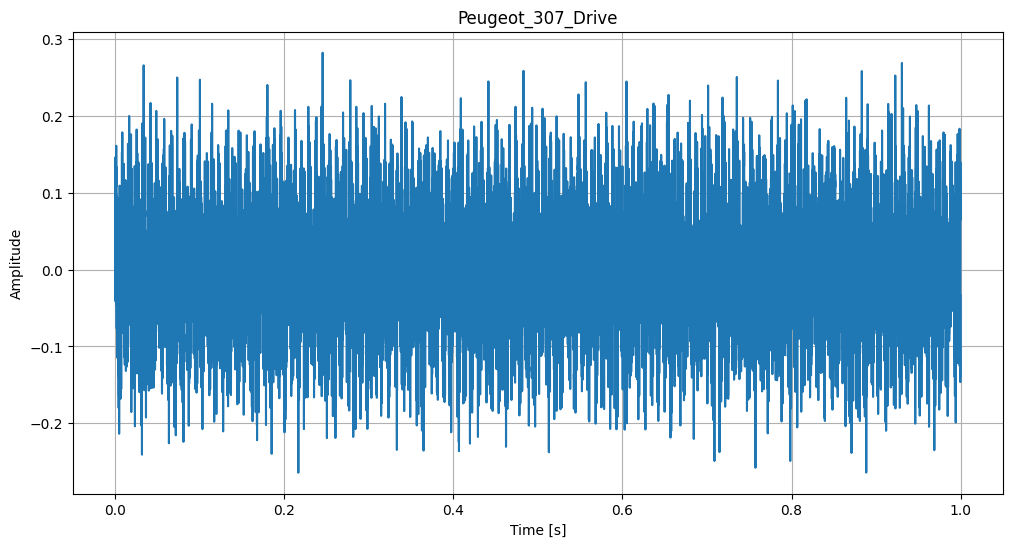

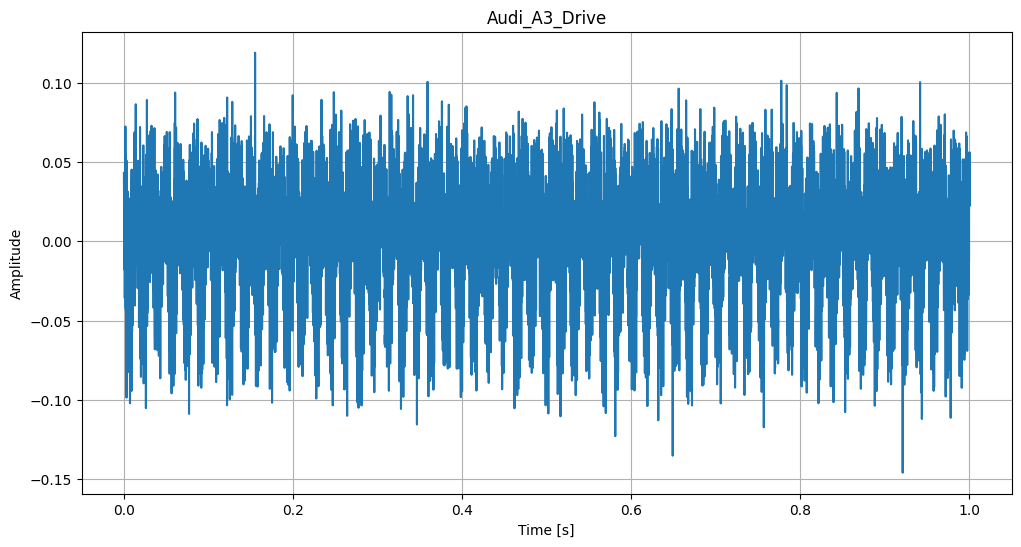

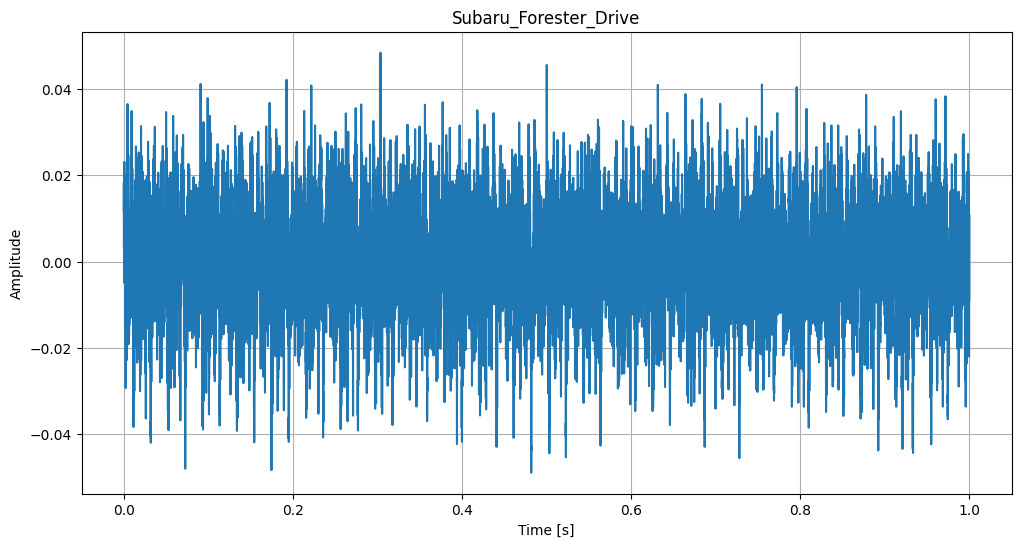

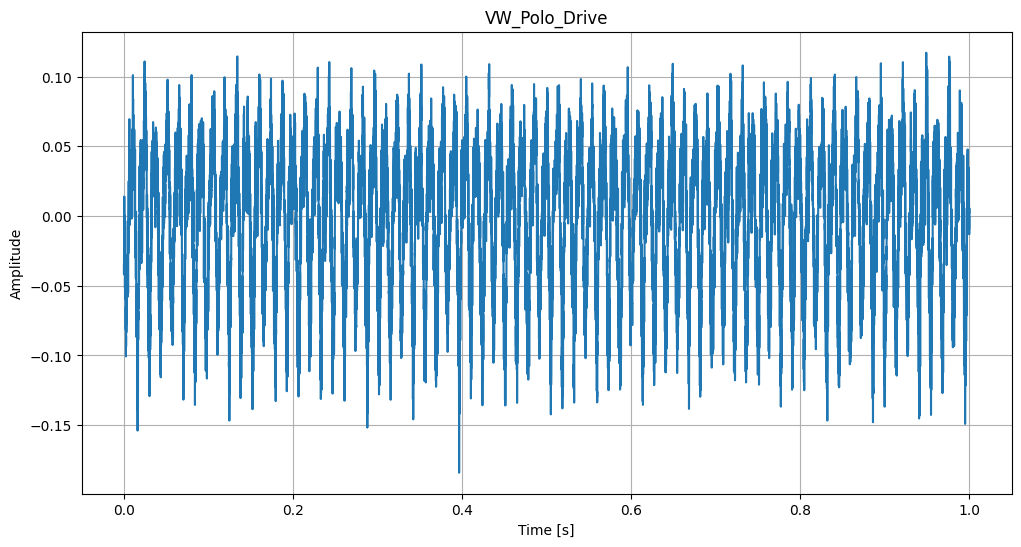

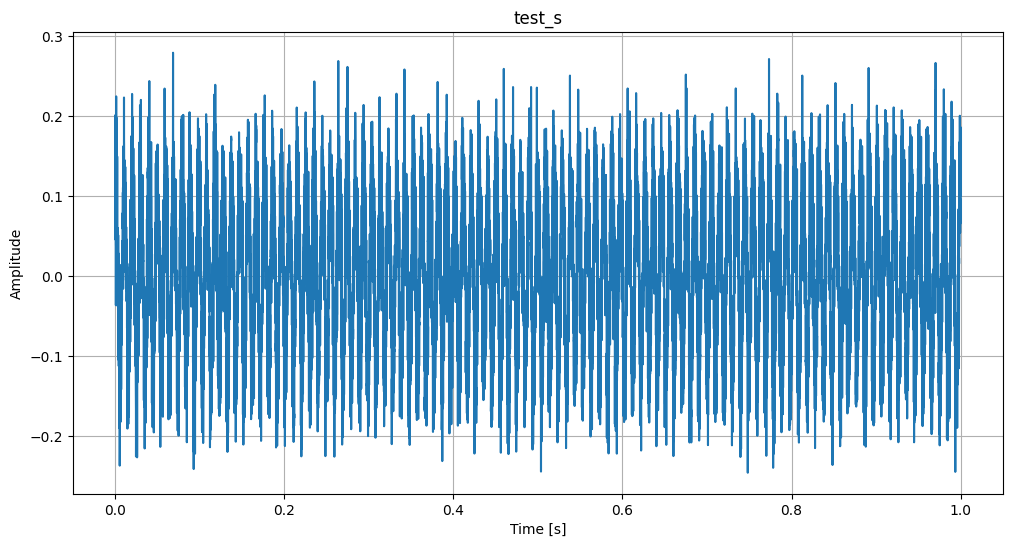

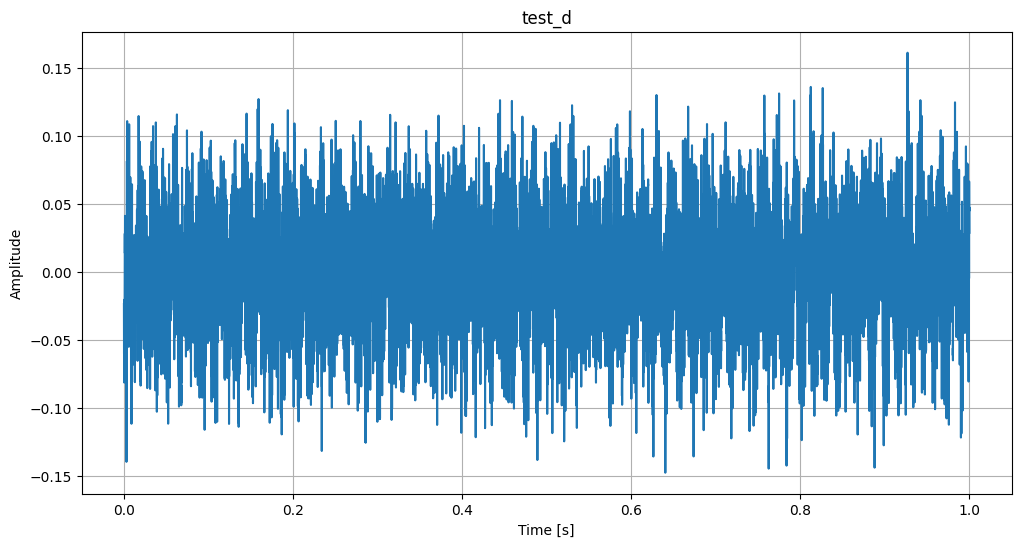

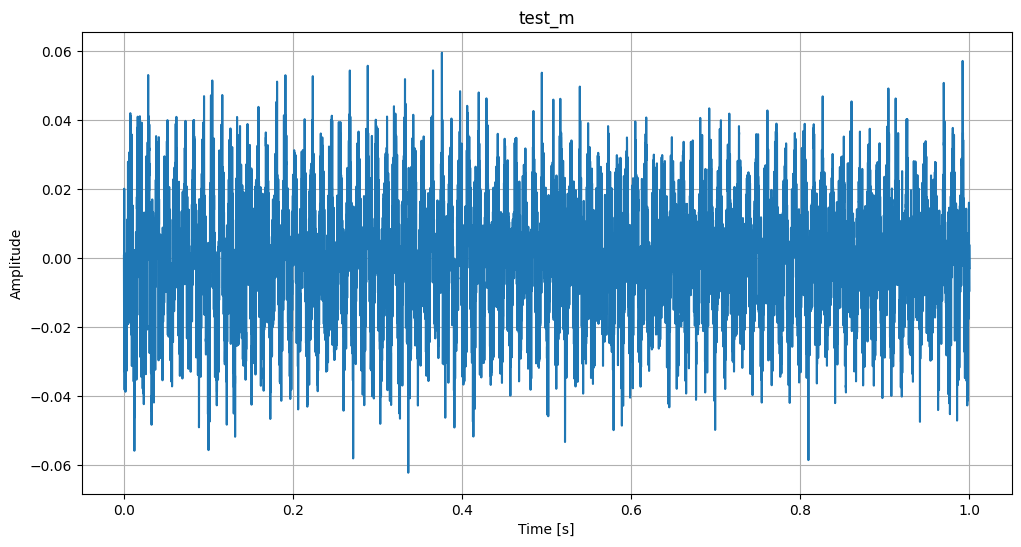

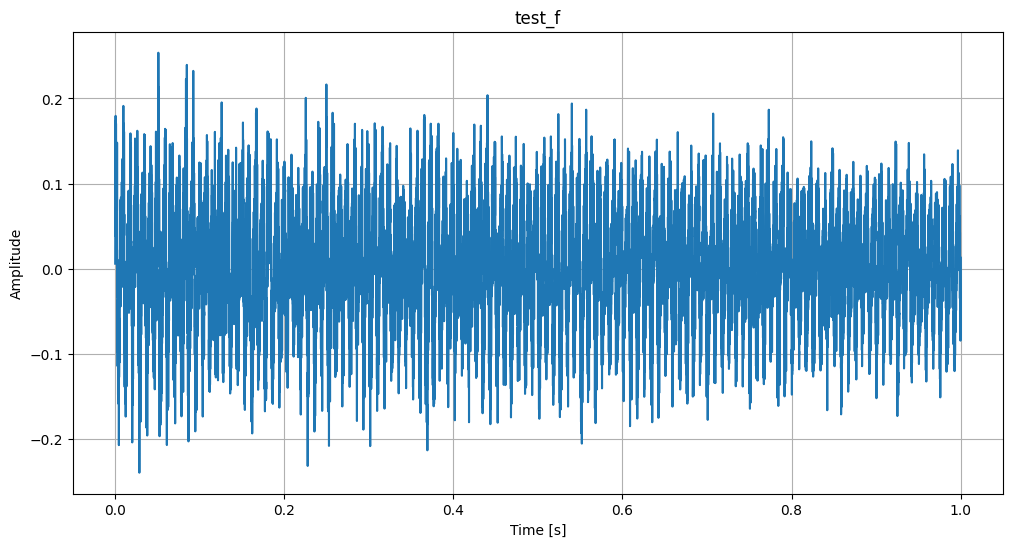

In [19]:
for signal, label in zip(signals, labels):
    duration = signal.shape[0] / Fs
    time = np.linspace(0, duration, num=signal.shape[0])
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, signal)
    plt.title(label)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Signals normalized

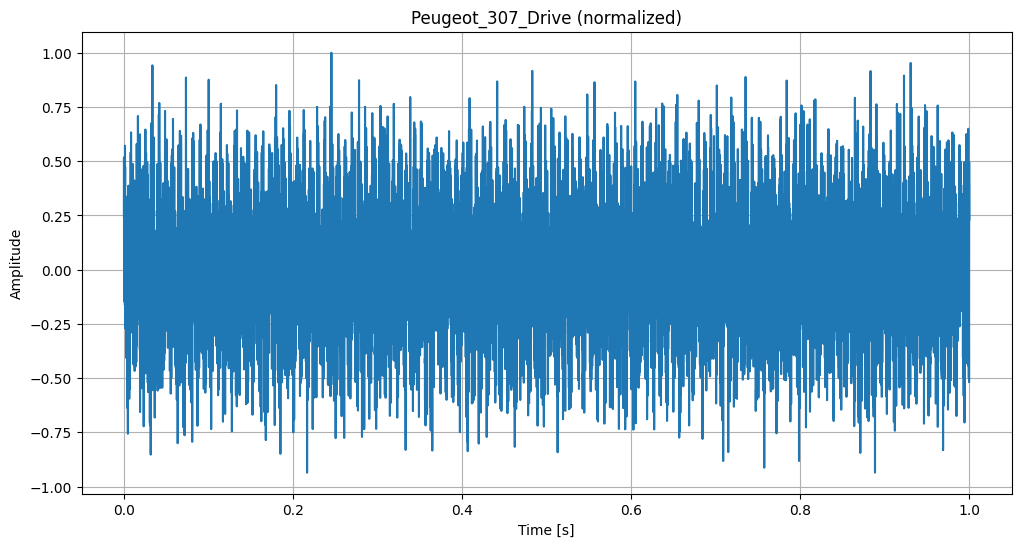

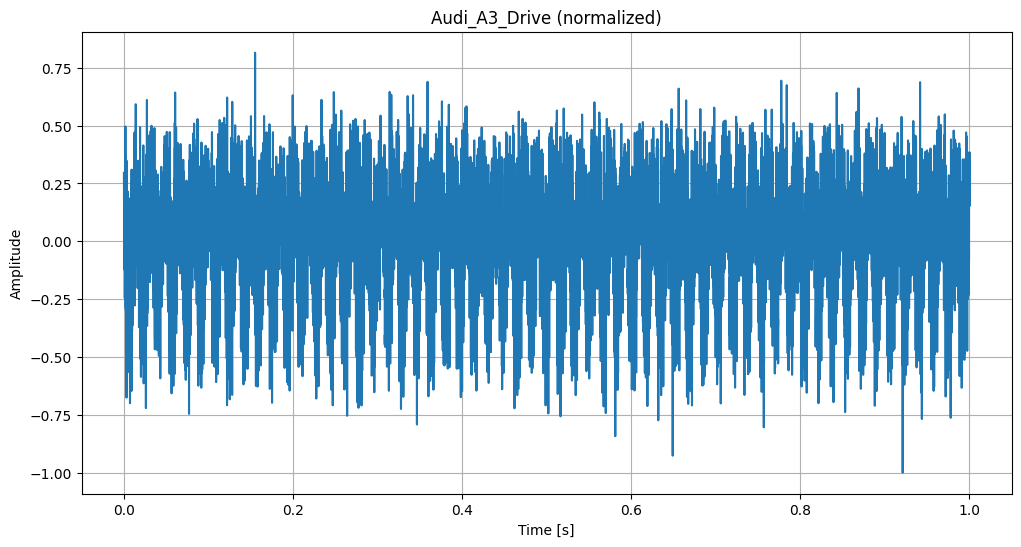

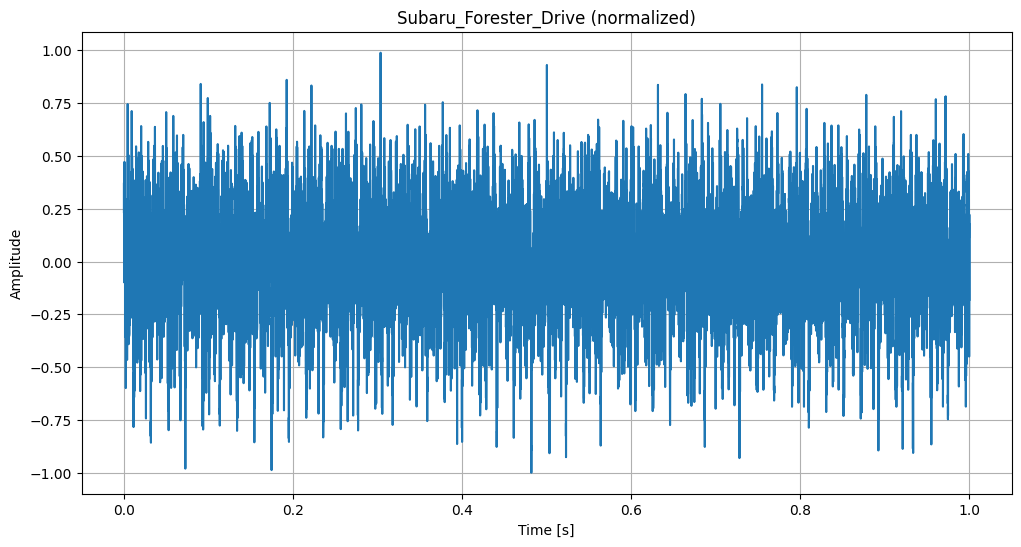

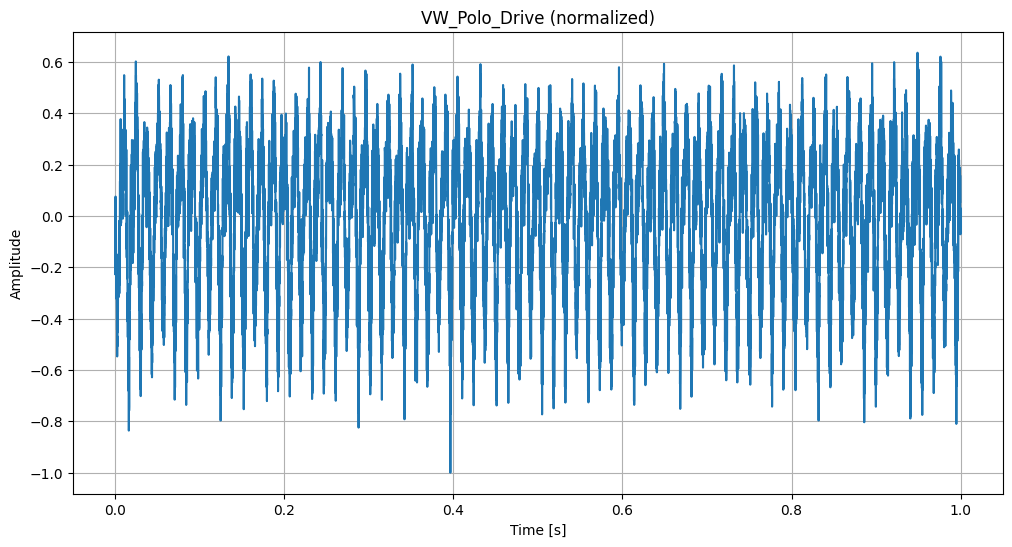

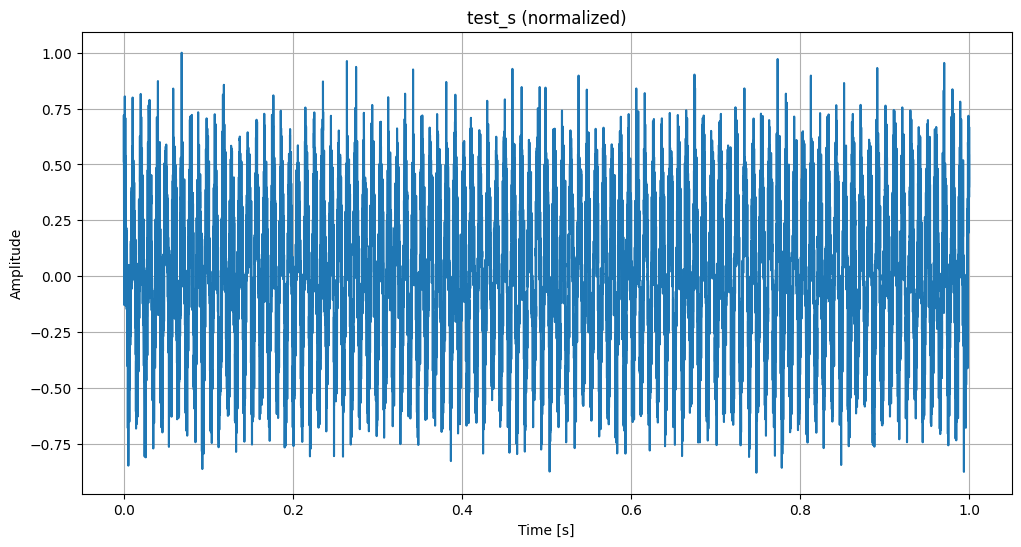

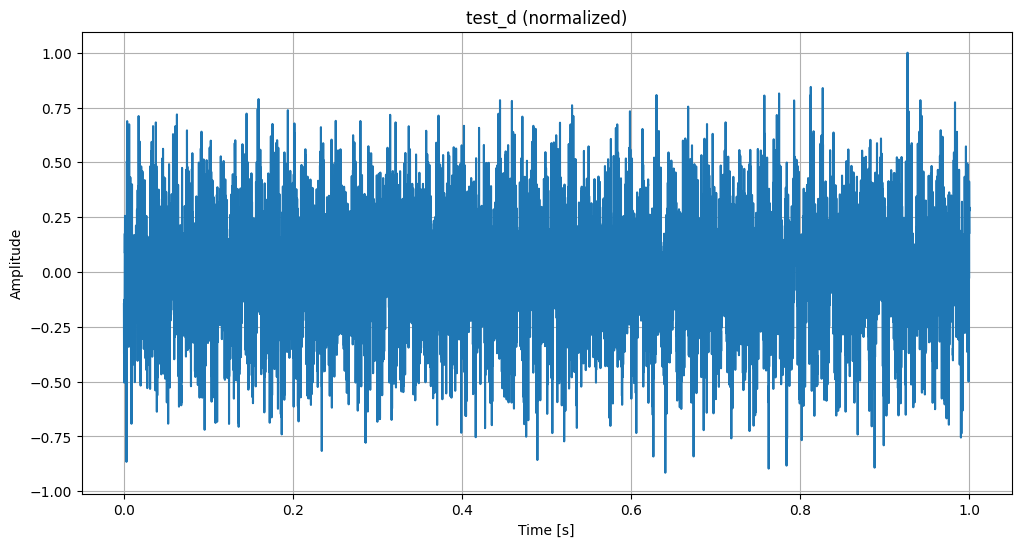

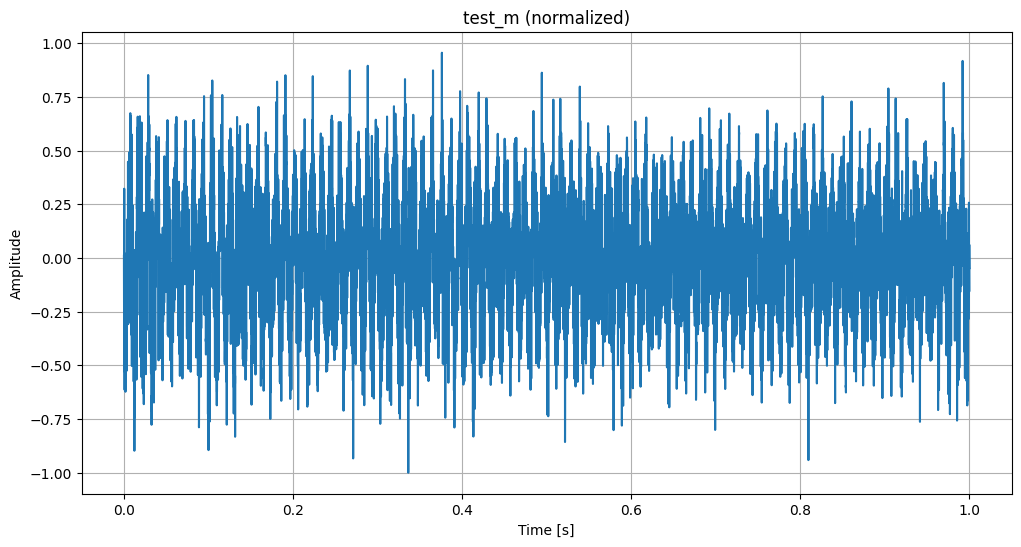

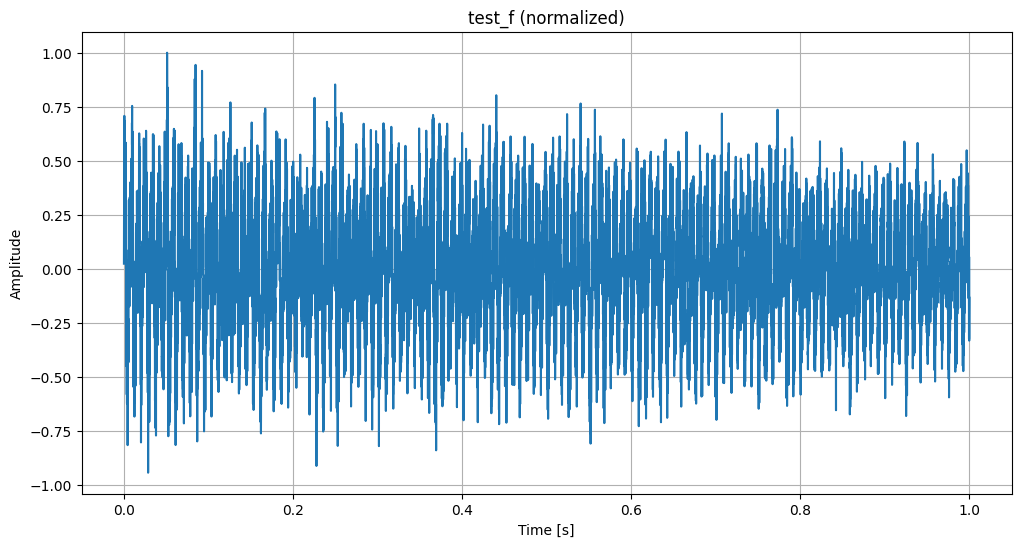

In [50]:
normalized_signals = []

for signal, label in zip(signals, labels):
    max_amplitude = np.max(np.abs(signal))  # Find the maximum absolute value
    normalized_signal = signal / max_amplitude  # Normalize the signal
    normalized_signals.append(normalized_signal)

    # Duration and time vector
    duration = signal.shape[0] / Fs
    time = np.linspace(0, duration, num=signal.shape[0])
    
    # Plot the normalized signal
    plt.figure(figsize=(12, 6))
    plt.plot(time, normalized_signal)
    plt.title(label + " (normalized)")
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Spectograms

/tmp/ipykernel_34965/360148573.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


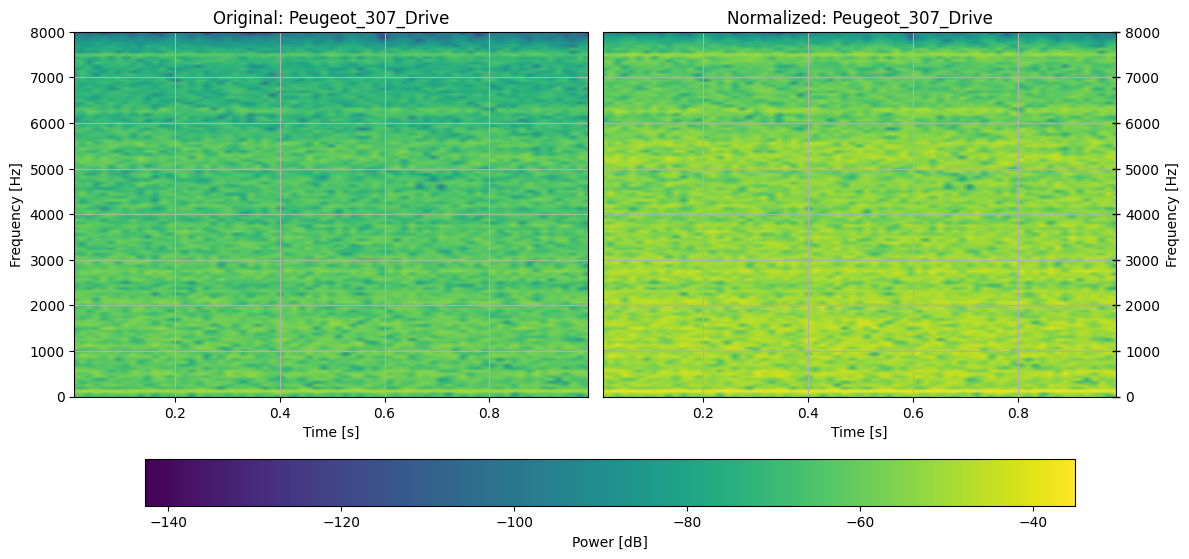

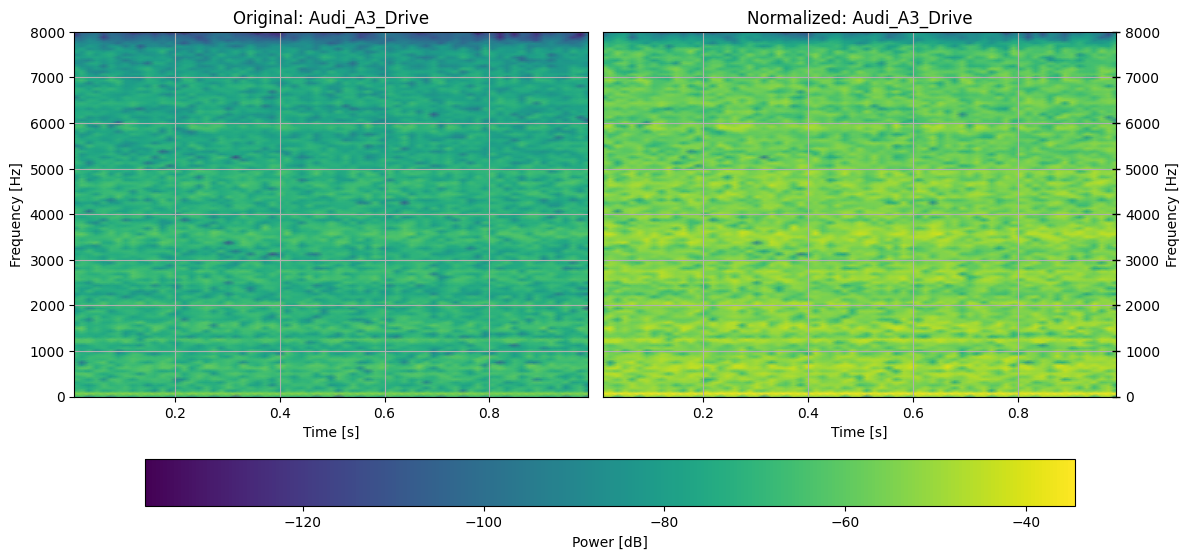

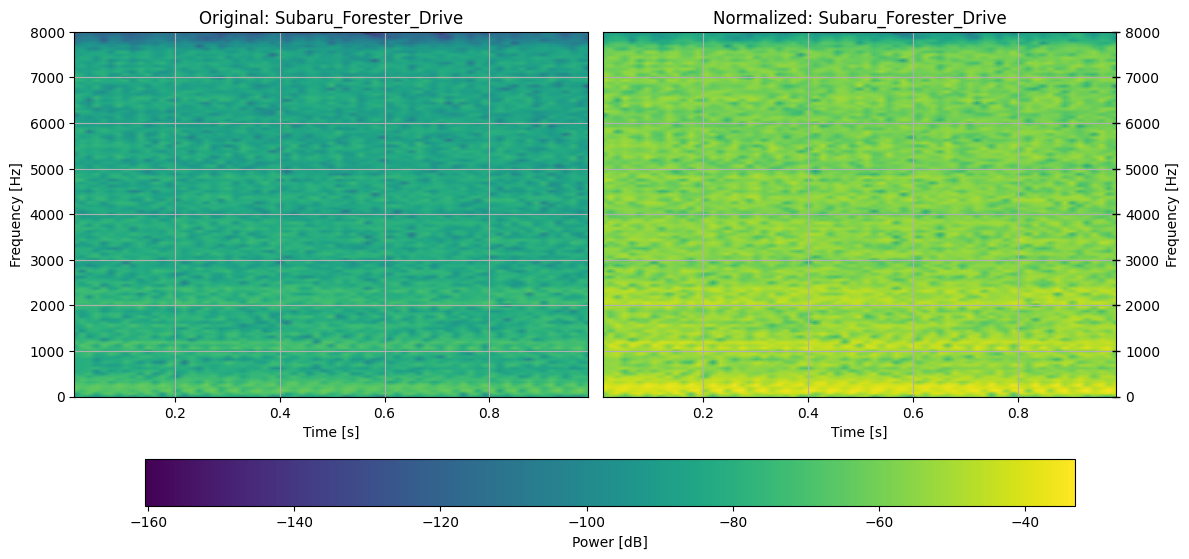

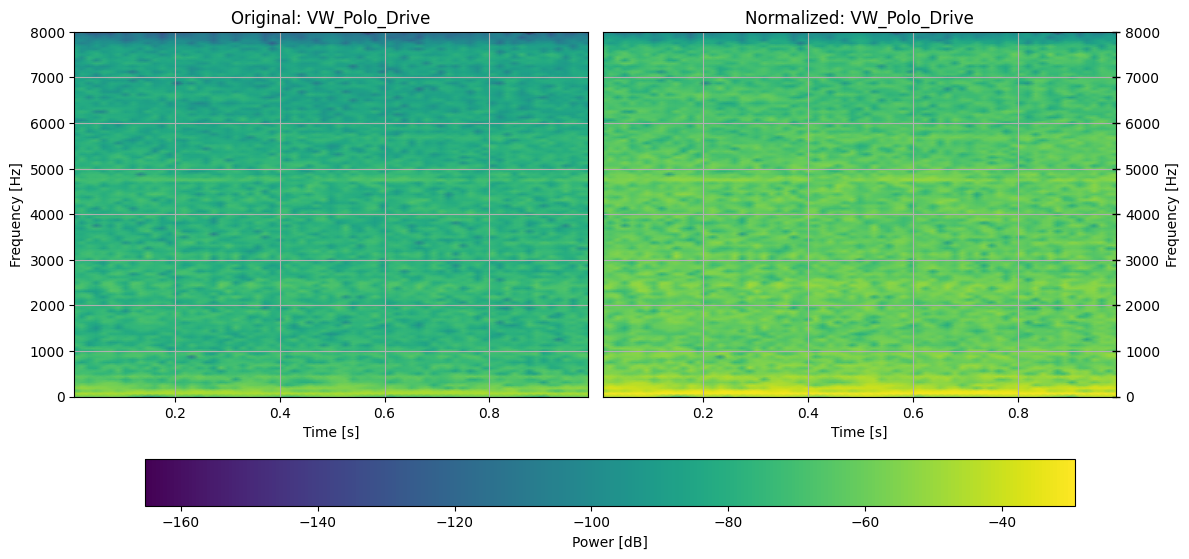

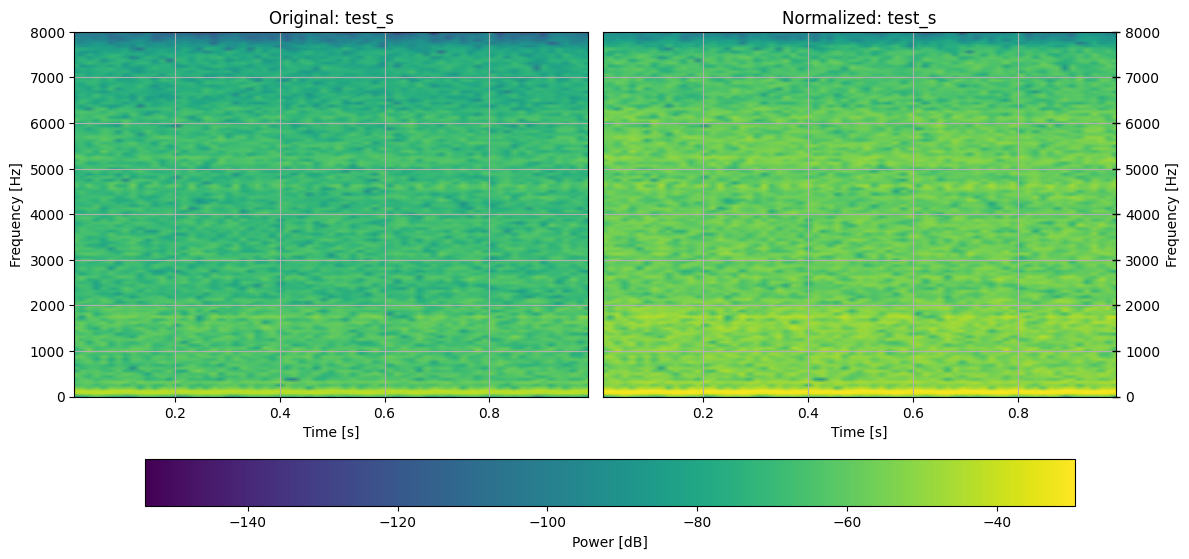

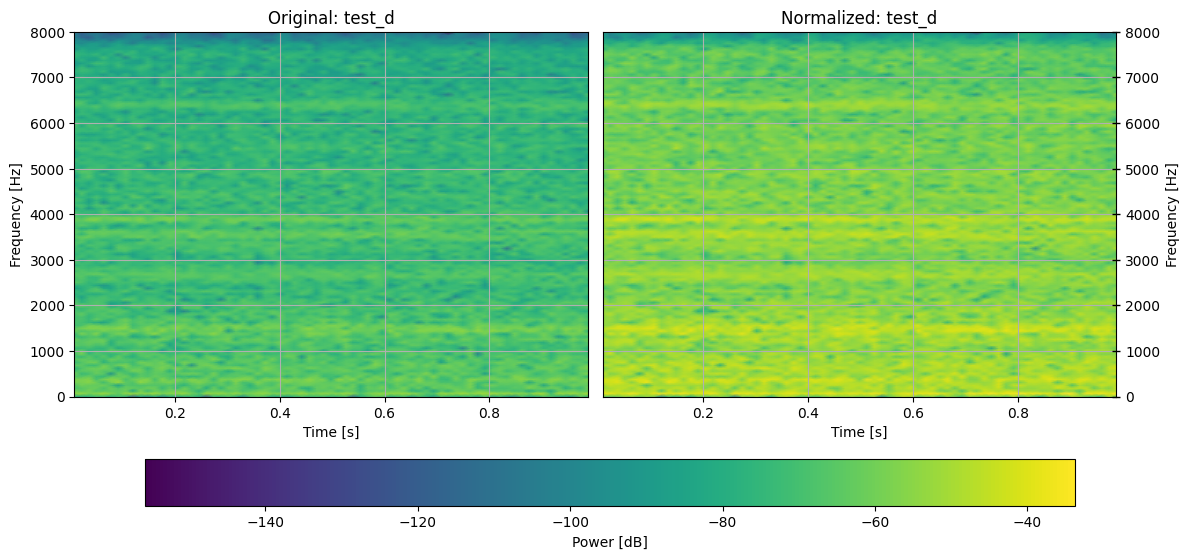

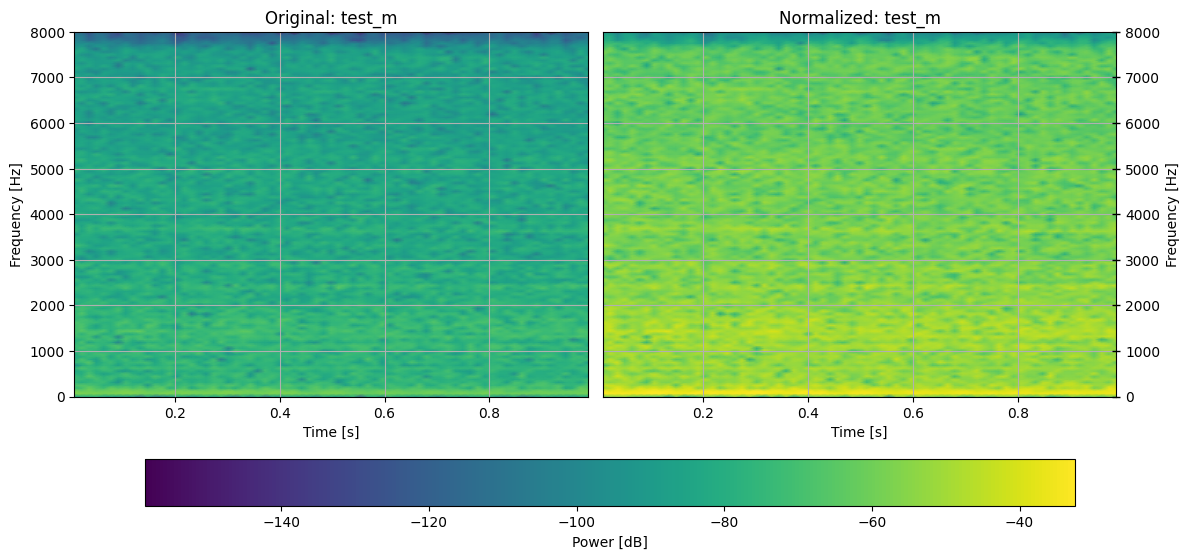

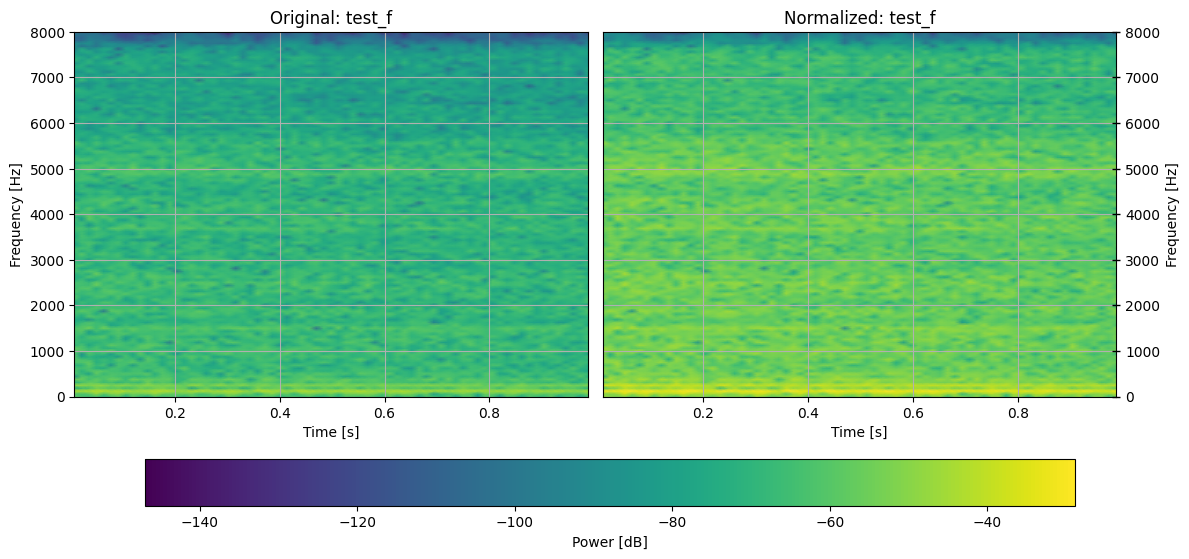

In [54]:
for signal, normalized, label in zip(signals, normalized_signals, labels):
    frequencies, times, Sxx = spectrogram(signal, fs=Fs)
    frequencies_norm, times_norm, Sxx_norm = spectrogram(normalized, fs=Fs)

    Sxx_dB = 10 * np.log10(Sxx)
    Sxx_norm_dB = 10 * np.log10(Sxx_norm)
    
    # Calculate global min and max dB values for consistent color scale
    min_dB = min(np.min(Sxx_dB), np.min(Sxx_norm_dB))
    max_dB = max(np.max(Sxx_dB), np.max(Sxx_norm_dB))

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Subplot 1: Spectrogram of original signal
    pc1 = axs[0].pcolormesh(times, frequencies, Sxx_dB, shading='gouraud', vmin=min_dB, vmax=max_dB)
    axs[0].set_title('Original: ' + label)
    axs[0].set_xlabel('Time [s]')
    axs[0].set_ylabel('Frequency [Hz]')
    axs[0].grid()

    # Subplot 2: Spectrogram of normalized signal
    pc2 = axs[1].pcolormesh(times_norm, frequencies_norm, Sxx_norm_dB, shading='gouraud', vmin=min_dB, vmax=max_dB)
    axs[1].set_title('Normalized: ' + label)
    axs[1].set_xlabel('Time [s]')
    axs[1].set_ylabel('Frequency [Hz]')
    axs[1].grid()
    axs[1].tick_params(axis='y', direction='inout', length=6, width=1, colors='black', labelright=True, labelleft=False)
    axs[1].yaxis.set_ticks_position('right')
    axs[1].yaxis.set_label_position('right')

    # Add a single colorbar spanning both subplots
    cbar = fig.colorbar(pc1, ax=axs, orientation='horizontal', label='Power [dB]', pad=0.04)

    # Adjust layout to avoid overlap and give space for the colorbar
    plt.tight_layout()

    # Adjust space for the colorbar
    plt.subplots_adjust(bottom=0.33)  # Adjust this value for more/less space below the plot

    # Show the figure with both spectrograms
    plt.show()

# Author notes:
\* These sections are mostly copied from the assignement